In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/'CSCI 535 Project'/Implementation/training_models/

/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(y_true, y_pred, title): 
  cm = confusion_matrix(y_true, y_pred) 
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])  
  disp.plot()
  plt.title(title)
  plt.show(block=True)
  

In [14]:
import pickle 

def get_pickled_file(path_to_file = './data/embeddings/eval_tfidf_cleaned.pkl'): 
  data = None 

  with open(path_to_file, 'rb') as file:
    data = pickle.load(file)
  return data 

def get_tfidf_embedding(path_to_file='./data/embeddings/eval_tfidf_cleaned.pkl'): 
  data = get_pickled_file(path_to_file) 
  embeddings = [] 
  for i in range(data.shape[0]): 
    embeddings.append(data[i].toarray().tolist()[0])
  return embeddings 


In [23]:
x_train = get_tfidf_embedding('./data/embeddings/archive/misogyny_tfidf_cleaned.pkl')
x_test = get_tfidf_embedding('./data/embeddings/archive/eval_tfidf_cleaned.pkl' )

In [ ]:
import pandas as pd
dataset = pd.read_csv('./data/eval_data.csv') 


In [ ]:
def get_vad(dataset): 
  vad = [] 
  for i,j in dataset.iterrows(): 
    vad.append([j['arousal'], j['valence'], j['dominance']]) 
  return vad 

In [ ]:
vad = get_vad(dataset) 
embeddings = get_tfidf_embedding()

In [ ]:
def append_tfidf(embeddings, vad):
  append_vectors = [] 
  for i in range(len(embeddings)): 
    vector = [ embeddings[i], vad[i]+[0]*(len(embeddings[i])-3)] 
    append_vectors.append(vector) 
  
  return append_vectors

In [ ]:
appended = append_tfidf(embeddings, vad) 


In [ ]:
y_train = dataset['label'].to_list()

In [ ]:
X_train = np.array(appended)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression() 
svc = SVC() 
dt = DecisionTreeClassifier() 
rf = RandomForestClassifier() 

In [ ]:
X_train = np.reshape(X_train, (26, 2333*2))
X_train.shape

(26, 4666)

In [ ]:
X_train.shape

(26, 4666)

In [ ]:
rf.fit(X_train,y_train )

RandomForestClassifier()

In [ ]:
rf.predict(X_train)

# Logistic Regression

## Concatenation method - clean tfidf

In [27]:
!python scripts/ml_fusion_methods.py 

3623
3623
Statistic for  logistic  classifier
Cross-Validation Accuracy Scores [0.80434783 0.80434783 0.73913043 0.69565217 0.76086957]
Minimum Accuracy:  0.696
Average Accuracy:  0.761
Maximum Accuracy:  0.804
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.852     0.742     0.793        31
           1      0.733     0.846     0.786        26

    accuracy                          0.789        57
   macro avg      0.793     0.794     0.789        57
weighted avg      0.798     0.789     0.790        57



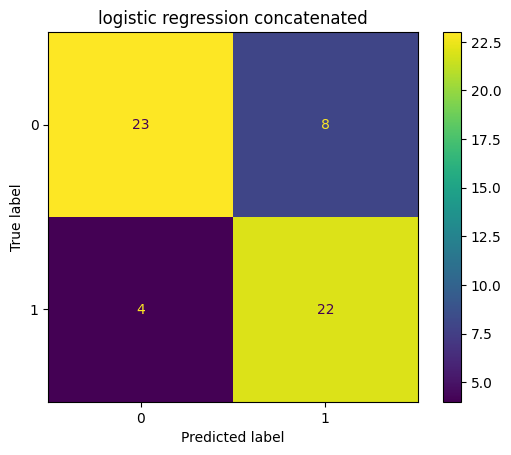

In [30]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'logistic regression concatenated')

## concatenation - unclean tfidf

In [31]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl'

3667
3667
Statistic for  logistic  classifier
Cross-Validation Accuracy Scores [0.86956522 0.86956522 0.76086957 0.73913043 0.76086957]
Minimum Accuracy:  0.739
Average Accuracy:  0.8
Maximum Accuracy:  0.87
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.828     0.774     0.800        31
           1      0.750     0.808     0.778        26

    accuracy                          0.789        57
   macro avg      0.789     0.791     0.789        57
weighted avg      0.792     0.789     0.790        57



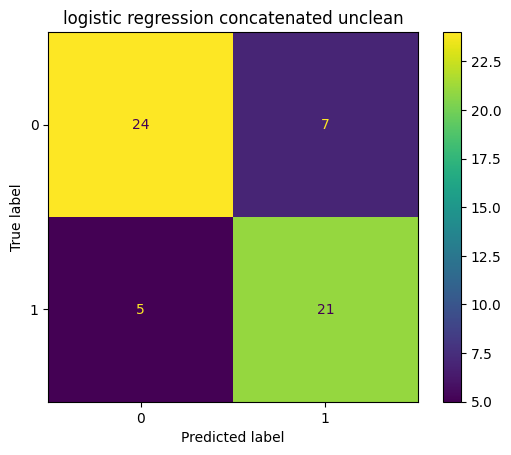

In [32]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

show_confusion_matrix(y_test, y_pred, 'logistic regression concatenated unclean')

## Text only - Clean tfidf

In [33]:
!python scripts/ml_fusion_methods.py --method 'text-only' 

3623
3623
Statistic for  logistic  classifier
Cross-Validation Accuracy Scores [0.84782609 0.82608696 0.7173913  0.76086957 0.7826087 ]
Minimum Accuracy:  0.717
Average Accuracy:  0.787
Maximum Accuracy:  0.848
y_pred =  [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.757     0.903     0.824        31
           1      0.850     0.654     0.739        26

    accuracy                          0.789        57
   macro avg      0.803     0.779     0.781        57
weighted avg      0.799     0.789     0.785        57



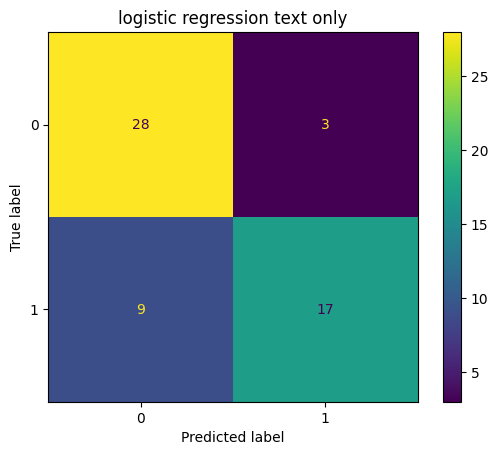

In [34]:
y_pred =  [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'logistic regression text only')

## Text only - unclean tfidf

In [35]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'text-only'

3667
3667
Statistic for  logistic  classifier
Cross-Validation Accuracy Scores [0.7826087  0.84782609 0.82608696 0.84782609 0.86956522]
Minimum Accuracy:  0.783
Average Accuracy:  0.835
Maximum Accuracy:  0.87
y_pred =  [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.778     0.903     0.836        31
           1      0.857     0.692     0.766        26

    accuracy                          0.807        57
   macro avg      0.817     0.798     0.801        57
weighted avg      0.814     0.807     0.804        57



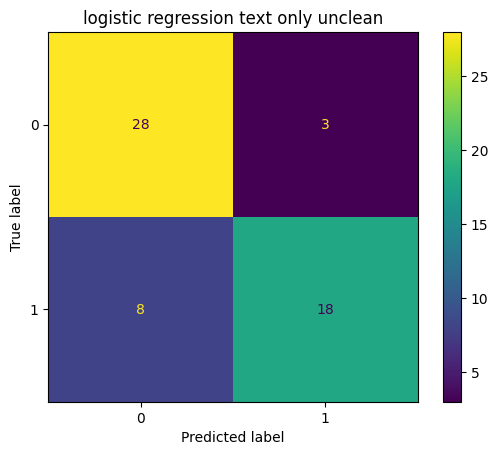

In [36]:
y_pred =  [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'logistic regression text only unclean')

## Append - unclean tfidf

In [37]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'append'

3667
3667
Statistic for  logistic  classifier
Cross-Validation Accuracy Scores [0.86956522 0.86956522 0.76086957 0.73913043 0.76086957]
Minimum Accuracy:  0.739
Average Accuracy:  0.8
Maximum Accuracy:  0.87
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.828     0.774     0.800        31
           1      0.750     0.808     0.778        26

    accuracy                          0.789        57
   macro avg      0.789     0.791     0.789        57
weighted avg      0.792     0.789     0.790        57



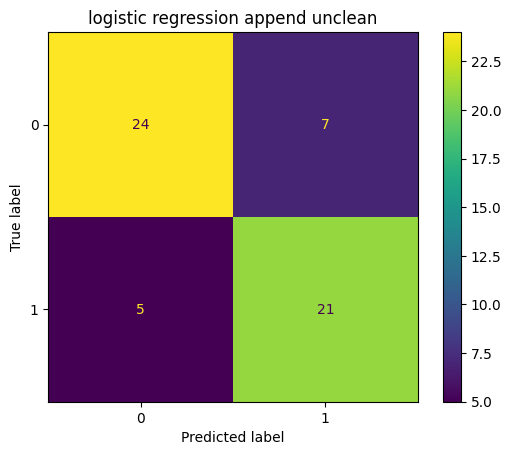

In [38]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 
show_confusion_matrix(y_test, y_pred, 'logistic regression append unclean')

## Append clean 

In [39]:
!python scripts/ml_fusion_methods.py --method 'append' 

3623
3623
Statistic for  logistic  classifier
Cross-Validation Accuracy Scores [0.80434783 0.80434783 0.73913043 0.69565217 0.76086957]
Minimum Accuracy:  0.696
Average Accuracy:  0.761
Maximum Accuracy:  0.804
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.852     0.742     0.793        31
           1      0.733     0.846     0.786        26

    accuracy                          0.789        57
   macro avg      0.793     0.794     0.789        57
weighted avg      0.798     0.789     0.790        57



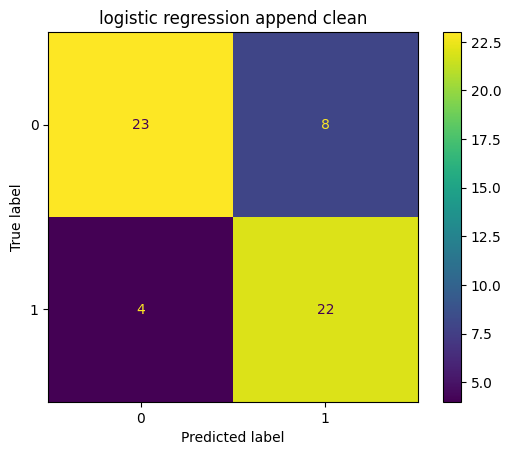

In [40]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

show_confusion_matrix(y_test, y_pred, 'logistic regression append clean')

# Decision Tree

## Text only - clean tfidf 

In [42]:
!python scripts/ml_fusion_methods.py --method 'text-only' --model_type 'decision_tree' 

3623
3623
Statistic for  decision_tree  classifier
Cross-Validation Accuracy Scores [0.86956522 0.80434783 0.76086957 0.7173913  0.82608696]
Minimum Accuracy:  0.717
Average Accuracy:  0.796
Maximum Accuracy:  0.87
y_pred =  [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.793     0.742     0.767        31
           1      0.714     0.769     0.741        26

    accuracy                          0.754        57
   macro avg      0.754     0.756     0.754        57
weighted avg      0.757     0.754     0.755        57



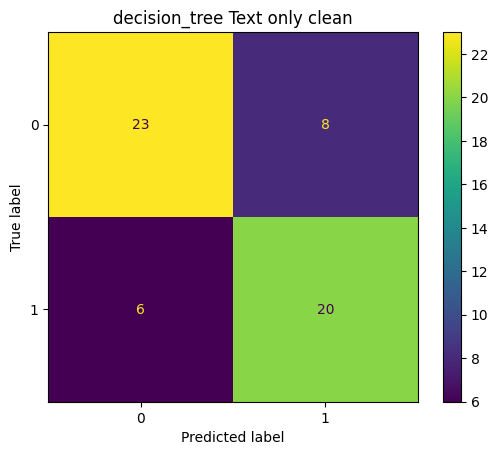

In [43]:
y_pred =  [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'decision_tree Text only clean')

## Text only - unclean tfidf

In [44]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'text-only' --model_type 'decision_tree'

3667
3667
Statistic for  decision_tree  classifier
Cross-Validation Accuracy Scores [0.84782609 0.69565217 0.82608696 0.80434783 0.80434783]
Minimum Accuracy:  0.696
Average Accuracy:  0.796
Maximum Accuracy:  0.848
y_pred =  [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.828     0.774     0.800        31
           1      0.750     0.808     0.778        26

    accuracy                          0.789        57
   macro avg      0.789     0.791     0.789        57
weighted avg      0.792     0.789     0.790        57



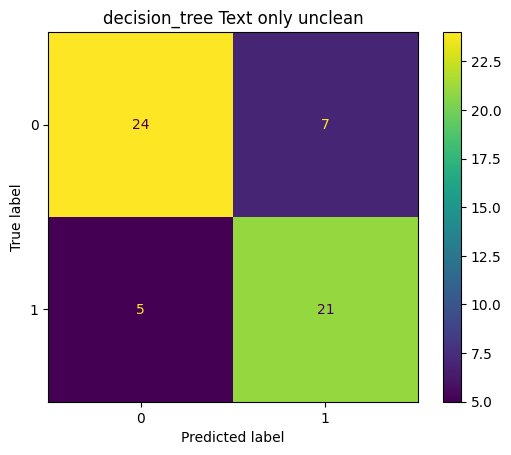

In [45]:
y_pred =  [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'decision_tree Text only unclean')

## Concatenate - clean tfidf 

In [46]:
!python scripts/ml_fusion_methods.py --model_type 'decision_tree' 

3623
3623
Statistic for  decision_tree  classifier
Cross-Validation Accuracy Scores [0.84782609 0.84782609 0.7173913  0.7826087  0.84782609]
Minimum Accuracy:  0.717
Average Accuracy:  0.809
Maximum Accuracy:  0.848
y_pred =  [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.862     0.806     0.833        31
           1      0.786     0.846     0.815        26

    accuracy                          0.825        57
   macro avg      0.824     0.826     0.824        57
weighted avg      0.827     0.825     0.825        57



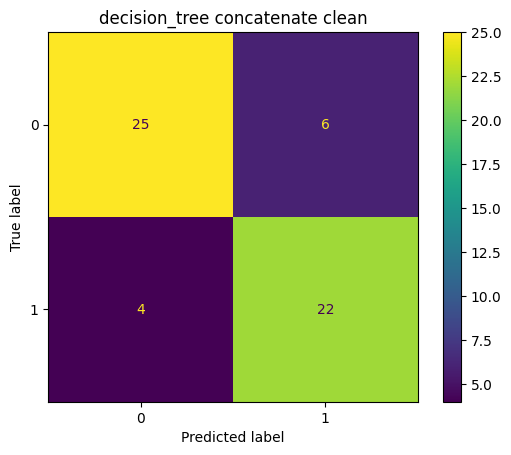

In [47]:
y_pred =  [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'decision_tree concatenate clean')

## concatenate - unclean tfidf 

In [48]:
!python scripts/ml_fusion_methods.py --model_type 'decision_tree' --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' 

3667
3667
Statistic for  decision_tree  classifier
Cross-Validation Accuracy Scores [0.84782609 0.86956522 0.76086957 0.82608696 0.86956522]
Minimum Accuracy:  0.761
Average Accuracy:  0.835
Maximum Accuracy:  0.87
y_pred =  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.920     0.742     0.821        31
           1      0.750     0.923     0.828        26

    accuracy                          0.825        57
   macro avg      0.835     0.833     0.825        57
weighted avg      0.842     0.825     0.824        57



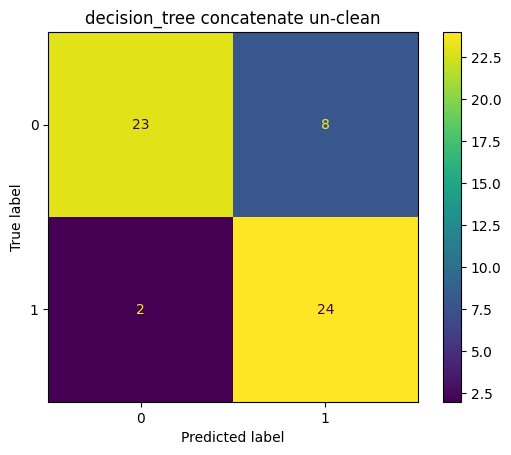

In [49]:
y_pred =  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'decision_tree concatenate un-clean')

## Append unclean tfidf

In [50]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'append' --model_type 'decision_tree' 

3667
3667
Statistic for  decision_tree  classifier
Cross-Validation Accuracy Scores [0.86956522 0.89130435 0.80434783 0.84782609 0.86956522]
Minimum Accuracy:  0.804
Average Accuracy:  0.857
Maximum Accuracy:  0.891
y_pred =  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.909     0.645     0.755        31
           1      0.686     0.923     0.787        26

    accuracy                          0.772        57
   macro avg      0.797     0.784     0.771        57
weighted avg      0.807     0.772     0.769        57



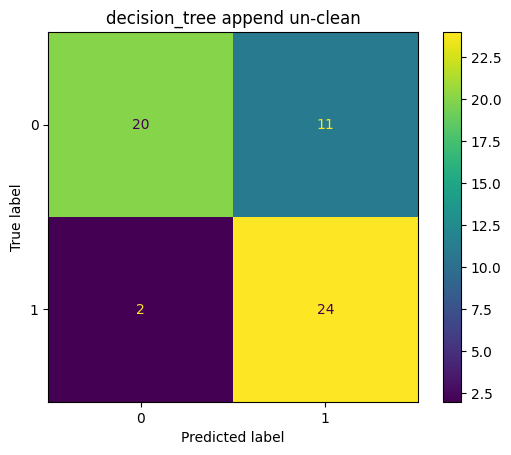

In [51]:
y_pred =  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

show_confusion_matrix(y_test, y_pred, 'decision_tree append un-clean')

## Append clean tfidf

In [52]:
!python scripts/ml_fusion_methods.py  --method 'append' --model_type 'decision_tree' 

3623
3623
Statistic for  decision_tree  classifier
Cross-Validation Accuracy Scores [0.84782609 0.80434783 0.73913043 0.82608696 0.84782609]
Minimum Accuracy:  0.739
Average Accuracy:  0.813
Maximum Accuracy:  0.848
y_pred =  [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.862     0.806     0.833        31
           1      0.786     0.846     0.815        26

    accuracy                          0.825        57
   macro avg      0.824     0.826     0.824        57
weighted avg      0.827     0.825     0.825        57



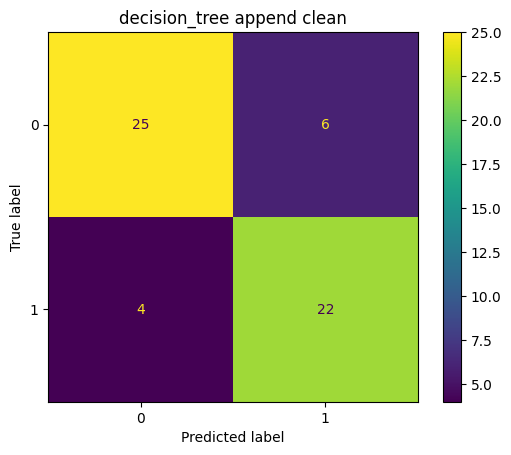

In [53]:
y_pred =  [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'decision_tree append clean')

# Random Forest

## Concat - clean tfidf

In [54]:
!python scripts/ml_fusion_methods.py --model_type 'random_forest'

3623
3623
Statistic for  random_forest  classifier
Cross-Validation Accuracy Scores [0.7826087  0.76086957 0.80434783 0.80434783 0.89130435]
Minimum Accuracy:  0.761
Average Accuracy:  0.809
Maximum Accuracy:  0.891
y_pred =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.880     0.710     0.786        31
           1      0.719     0.885     0.793        26

    accuracy                          0.789        57
   macro avg      0.799     0.797     0.789        57
weighted avg      0.806     0.789     0.789        57



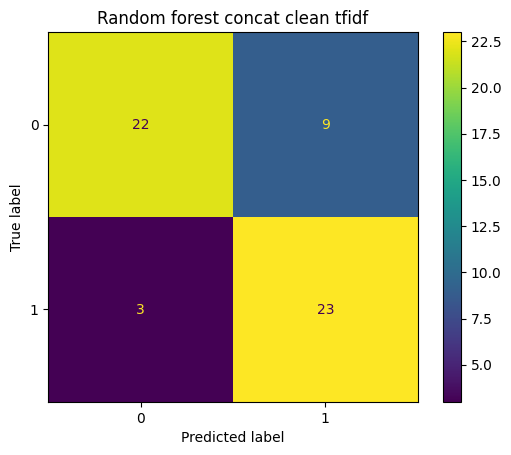

In [55]:
y_pred =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'Random forest concat clean tfidf')

## concat unclean tfidf

In [56]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'concat' --model_type 'random_forest' 

3667
3667
Statistic for  random_forest  classifier
Cross-Validation Accuracy Scores [0.7173913  0.7826087  0.73913043 0.89130435 0.84782609]
Minimum Accuracy:  0.717
Average Accuracy:  0.796
Maximum Accuracy:  0.891
y_pred =  [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.833     0.806     0.820        31
           1      0.778     0.808     0.792        26

    accuracy                          0.807        57
   macro avg      0.806     0.807     0.806        57
weighted avg      0.808     0.807     0.807        57



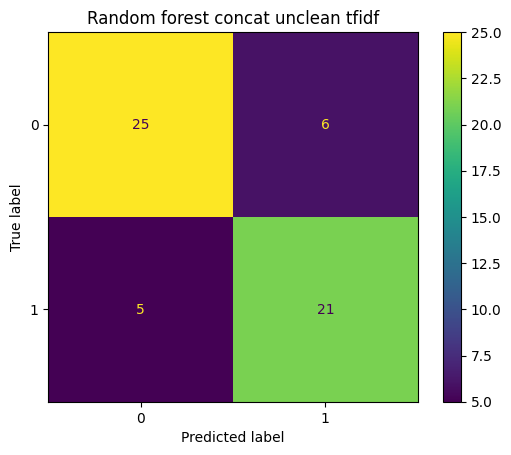

In [57]:
y_pred =  [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'Random forest concat unclean tfidf')

## text only unclean tfidf

In [59]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl'  --method 'text-only' --model_type 'random_forest' 

3667
3667
Statistic for  random_forest  classifier
Cross-Validation Accuracy Scores [0.65217391 0.89130435 0.7826087  0.89130435 0.97826087]
Minimum Accuracy:  0.652
Average Accuracy:  0.839
Maximum Accuracy:  0.978
y_pred =  [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.765     0.839     0.800        31
           1      0.783     0.692     0.735        26

    accuracy                          0.772        57
   macro avg      0.774     0.766     0.767        57
weighted avg      0.773     0.772     0.770        57



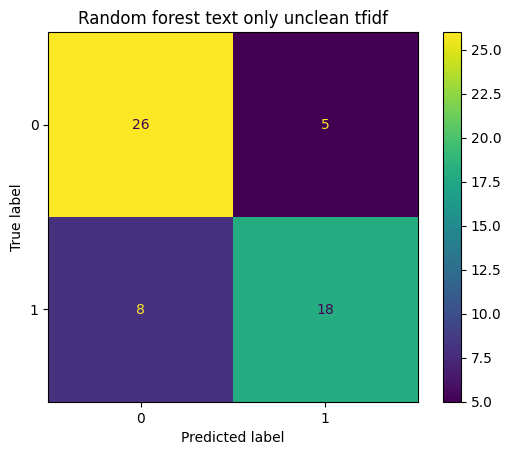

In [60]:
y_pred =  [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 
show_confusion_matrix(y_test, y_pred, 'Random forest text only unclean tfidf')

## Text only clean 

In [61]:
!python scripts/ml_fusion_methods.py  --method 'text-only' --model_type 'random_forest' 

3623
3623
Statistic for  random_forest  classifier
Cross-Validation Accuracy Scores [0.65217391 0.7173913  0.69565217 0.82608696 0.89130435]
Minimum Accuracy:  0.652
Average Accuracy:  0.757
Maximum Accuracy:  0.891
y_pred =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.864     0.613     0.717        31
           1      0.657     0.885     0.754        26

    accuracy                          0.737        57
   macro avg      0.760     0.749     0.736        57
weighted avg      0.769     0.737     0.734        57



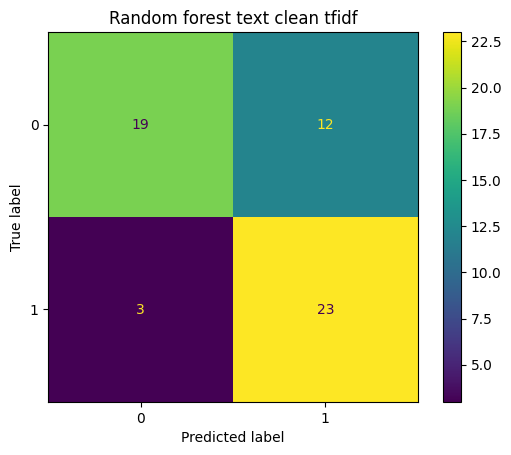

In [62]:
y_pred =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'Random forest text clean tfidf')

## Append clean tfidf

In [63]:
!python scripts/ml_fusion_methods.py  --method 'append' --model_type 'random_forest' 

3623
3623
Statistic for  random_forest  classifier
Cross-Validation Accuracy Scores [0.73913043 0.7826087  0.67391304 0.89130435 0.93478261]
Minimum Accuracy:  0.674
Average Accuracy:  0.804
Maximum Accuracy:  0.935
y_pred =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.857     0.774     0.814        31
           1      0.759     0.846     0.800        26

    accuracy                          0.807        57
   macro avg      0.808     0.810     0.807        57
weighted avg      0.812     0.807     0.807        57



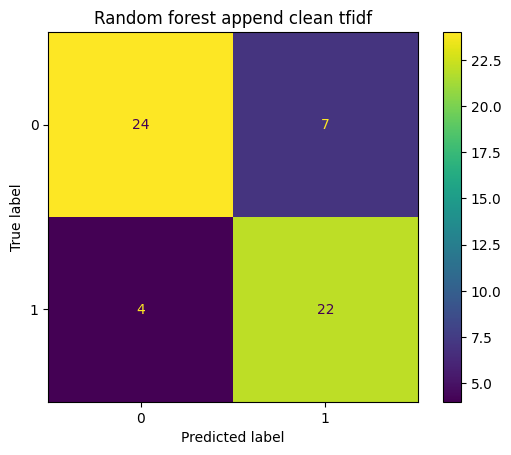

In [64]:
y_pred =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

show_confusion_matrix(y_test, y_pred, 'Random forest append clean tfidf')

## Append unclean tfidf

In [65]:
!python scripts/ml_fusion_methods.py --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'append' --model_type 'random_forest' 

3667
3667
Statistic for  random_forest  classifier
Cross-Validation Accuracy Scores [0.76086957 0.73913043 0.67391304 0.89130435 0.86956522]
Minimum Accuracy:  0.674
Average Accuracy:  0.787
Maximum Accuracy:  0.891
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.800     0.774     0.787        31
           1      0.741     0.769     0.755        26

    accuracy                          0.772        57
   macro avg      0.770     0.772     0.771        57
weighted avg      0.773     0.772     0.772        57



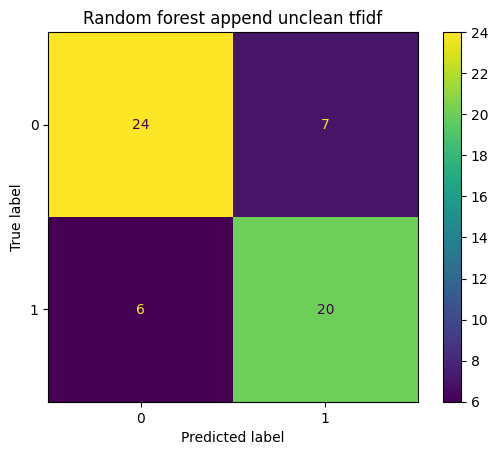

In [66]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'Random forest append unclean tfidf')

# SVC

## Concat clean 

In [67]:
!python scripts/ml_fusion_methods.py --model_type 'SVC'

3623
3623
Statistic for  SVC  classifier
Cross-Validation Accuracy Scores [0.86956522 0.86956522 0.82608696 0.76086957 0.84782609]
Minimum Accuracy:  0.761
Average Accuracy:  0.835
Maximum Accuracy:  0.87
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.893     0.806     0.847        31
           1      0.793     0.885     0.836        26

    accuracy                          0.842        57
   macro avg      0.843     0.846     0.842        57
weighted avg      0.847     0.842     0.842        57



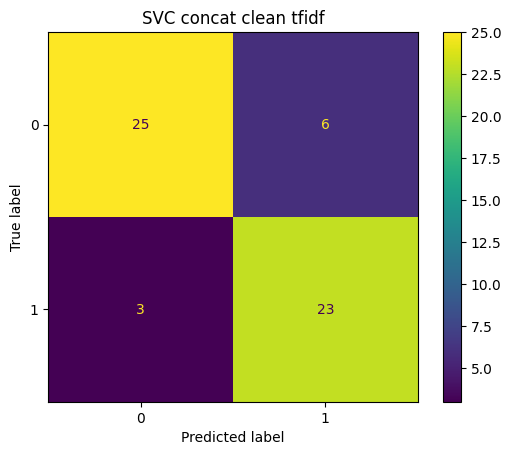

In [68]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'SVC concat clean tfidf')

## Concat unclean 

In [69]:
!python scripts/ml_fusion_methods.py --model_type 'SVC' --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl'

3667
3667
Statistic for  SVC  classifier
Cross-Validation Accuracy Scores [0.91304348 0.89130435 0.89130435 0.91304348 0.84782609]
Minimum Accuracy:  0.848
Average Accuracy:  0.891
Maximum Accuracy:  0.913
y_pred =  [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.871     0.871     0.871        31
           1      0.846     0.846     0.846        26

    accuracy                          0.860        57
   macro avg      0.859     0.859     0.859        57
weighted avg      0.860     0.860     0.860        57



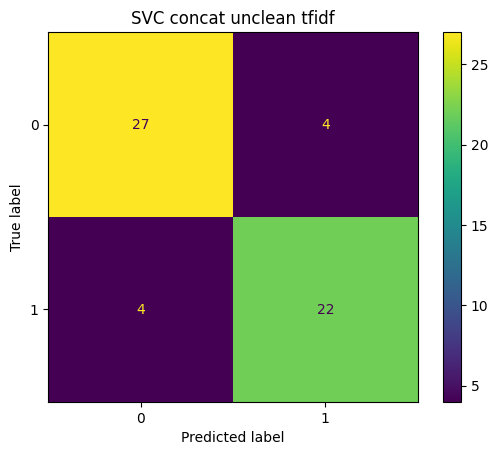

In [70]:
y_pred =  [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

show_confusion_matrix(y_test, y_pred, 'SVC concat unclean tfidf')

## text only unclean 

In [71]:
!python scripts/ml_fusion_methods.py --model_type 'SVC' --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'text-only'

3667
3667
Statistic for  SVC  classifier
Cross-Validation Accuracy Scores [0.86956522 0.89130435 0.84782609 0.89130435 0.89130435]
Minimum Accuracy:  0.848
Average Accuracy:  0.878
Maximum Accuracy:  0.891
y_pred =  [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.824     0.903     0.862        31
           1      0.870     0.769     0.816        26

    accuracy                          0.842        57
   macro avg      0.847     0.836     0.839        57
weighted avg      0.845     0.842     0.841        57



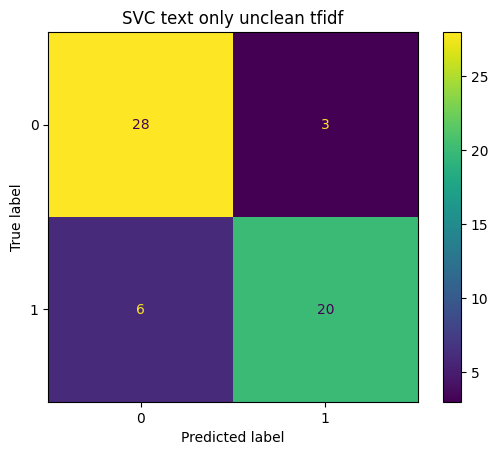

In [72]:
y_pred =  [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'SVC text only unclean tfidf')

## Text only clean

In [73]:
!python scripts/ml_fusion_methods.py --model_type 'SVC' --method 'text-only'

3623
3623
Statistic for  SVC  classifier
Cross-Validation Accuracy Scores [0.91304348 0.89130435 0.84782609 0.80434783 0.82608696]
Minimum Accuracy:  0.804
Average Accuracy:  0.857
Maximum Accuracy:  0.913
y_pred =  [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.757     0.903     0.824        31
           1      0.850     0.654     0.739        26

    accuracy                          0.789        57
   macro avg      0.803     0.779     0.781        57
weighted avg      0.799     0.789     0.785        57



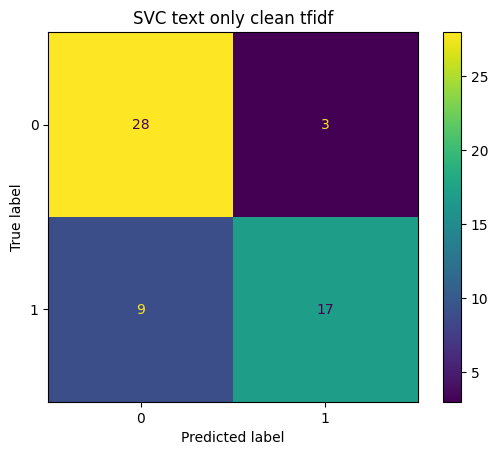

In [74]:
y_pred =  [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'SVC text only clean tfidf')

## Append clean 

In [75]:
!python scripts/ml_fusion_methods.py --model_type 'SVC' --method 'append'

3623
3623
Statistic for  SVC  classifier
Cross-Validation Accuracy Scores [0.86956522 0.86956522 0.82608696 0.76086957 0.84782609]
Minimum Accuracy:  0.761
Average Accuracy:  0.835
Maximum Accuracy:  0.87
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.893     0.806     0.847        31
           1      0.793     0.885     0.836        26

    accuracy                          0.842        57
   macro avg      0.843     0.846     0.842        57
weighted avg      0.847     0.842     0.842        57



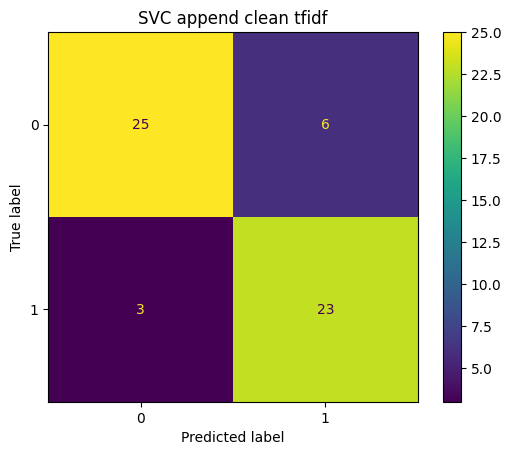

In [76]:
y_pred =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'SVC append clean tfidf')

## Append unclean 

In [77]:
!python scripts/ml_fusion_methods.py --model_type 'SVC' --train_embeddings_path './data/embeddings/tfidf_train.pkl' --test_embeddings_path './data/embeddings/eval_tfidf.pkl' --method 'append'

3667
3667
Statistic for  SVC  classifier
Cross-Validation Accuracy Scores [0.91304348 0.89130435 0.89130435 0.91304348 0.84782609]
Minimum Accuracy:  0.848
Average Accuracy:  0.891
Maximum Accuracy:  0.913
y_pred =  [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0      0.871     0.871     0.871        31
           1      0.846     0.846     0.846        26

    accuracy                          0.860        57
   macro avg      0.859     0.859     0.859        57
weighted avg      0.860     0.860     0.860        57



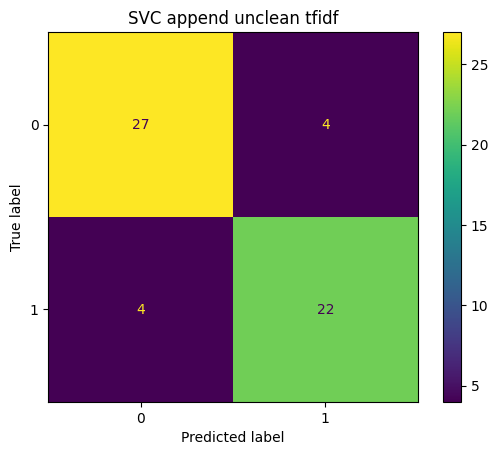

In [78]:
y_pred =  [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
show_confusion_matrix(y_test, y_pred, 'SVC append unclean tfidf')